In [70]:
import sys
sys.path.append("../../src")
import numpy as np
import models,constants
from maneuvers import Maneuvers
from datetime import datetime
import matplotlib.pyplot as plt
import ipyvolume as ipv
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
# Initial Conditions
#rp = 384000e3
#ra = 384001e3
rp = constants.Re+500e3
ra = constants.Re+510e3
Omega = 20*np.pi/180
i = 20*np.pi/180
omega = 0*np.pi/180
nu = 300*np.pi/180
a = (rp+ra)/2
e = ra/a-1
coe = [a,e,i,omega,Omega,nu]

startDate = datetime.now()

# Spacecraft
wetMass = 3
propMass = 2.9
area = 10
satellite = models.Spacecraft(wetMass,wetMass-propMass,area)

# Thruster
thrust = 10e-3
isp = 720
satellite.thruster = models.Thruster(thrust=thrust,isp=isp)
thruster2 = models.Thruster(thrust=500e-6,isp=isp)
# Maneuvers
maneuver = Maneuvers(coe,satellite,startDate,formulation="betts",verbose=True)
maneuver.addPerturbation("moon_gravity")
maneuver.addPerturbation("thrust")
maneuver.setTargetRun([384000e3+constants.Re,None,None,None,None])
maneuver.propagate(60*60*24*13,60*10);
satellite.thruster = thruster2
maneuver.setTargetRun([384000e3+constants.Re-constants.Rm-1e3,0.01,None,None,None])
maneuver.propagate(60*60*24*50,60*10);
maneuver.setTargetRun([384000e3+constants.Re-constants.Rm-1e3,None,None,None,None])
maneuver.propagate(60*60*24*1,60*10);
maneuver.removePerturbation("thrust")
maneuver.propagate(60*60*24*20,60*10);


Propagating...from day  0.0  to  13.0
Day: 13.000	Altitude: 67796.991 km	Mass: 1.309
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%

Propagating...from day  13.0  to  63.0
Day: 63.000	Altitude: 271359.646 km	Mass: 1.003
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%

Propagating...from day  63.0  to  64.0
Day: 64.000	Altitude: 273074.348 km	Mass: 0.997
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%

Propagating...from day  64.0  to  84.0
Day: 84.000	Altitude: 360374.728 km	Mass: 0.997
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%



Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

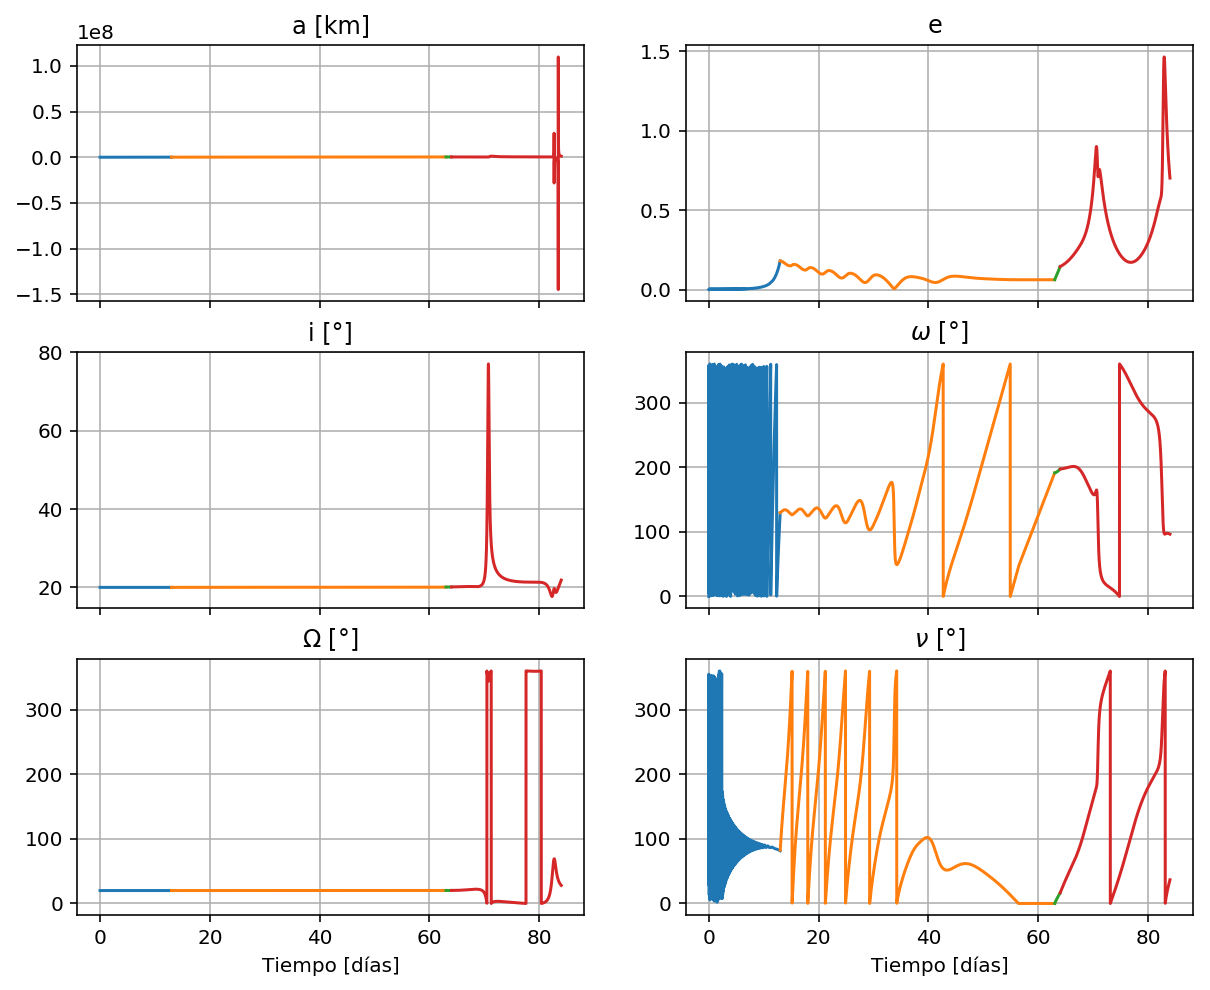

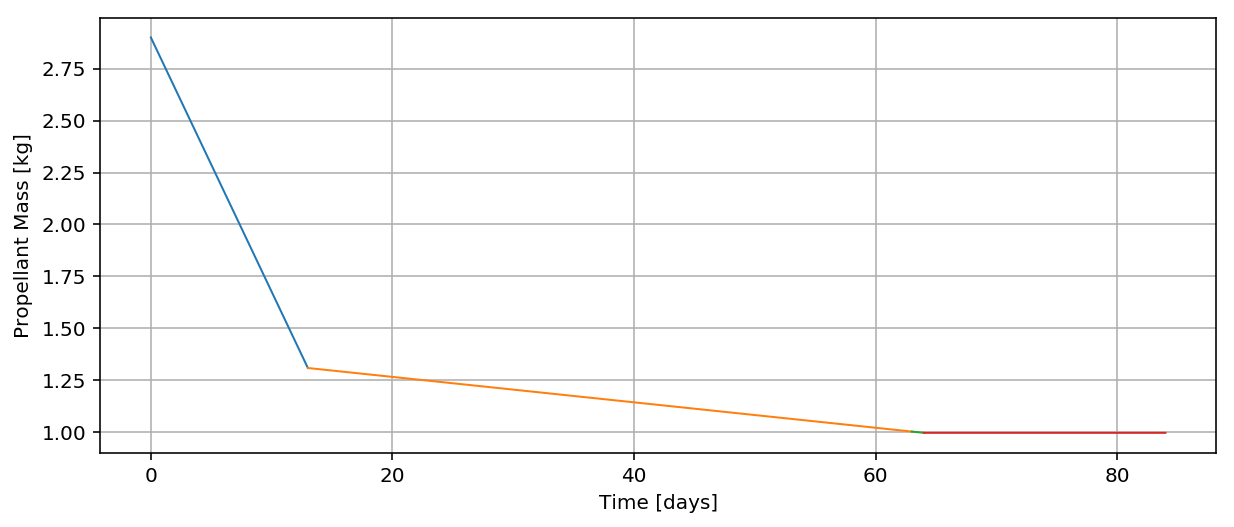

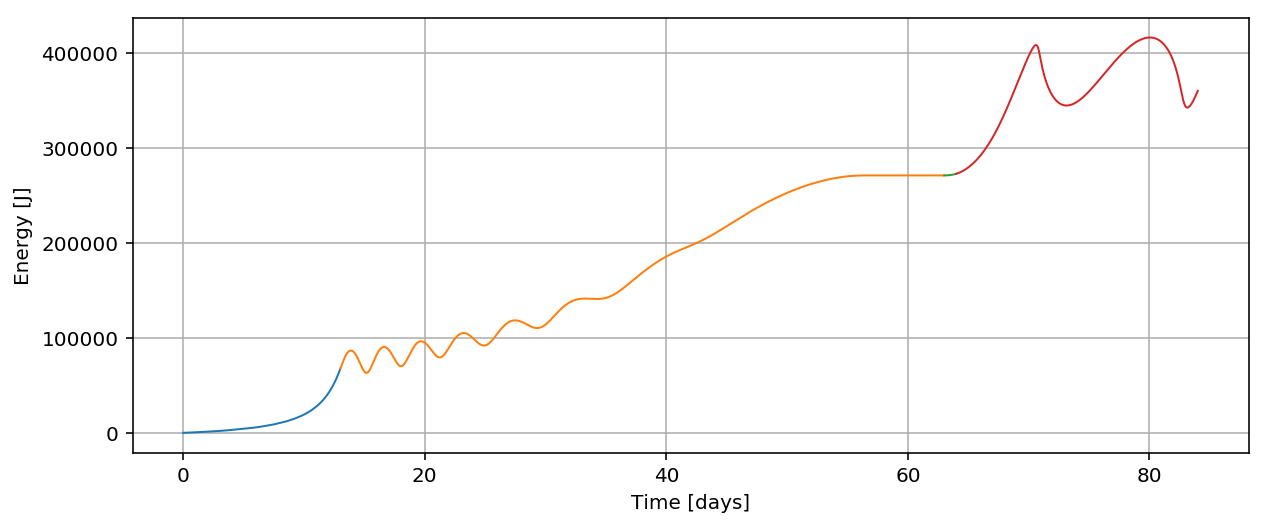

In [151]:
%matplotlib inline
maneuver.plot("coe")
fig = maneuver.ipvPlot3D()
ipv.xyzlim(400e3)
display(fig)
maneuver.ipvPlot3DMoon()

#ax.scatter(lunarPosition2[0],lunarPosition2[1],lunarPosition2[2],c="red")
#ax.scatter(lunarPosition3[0],lunarPosition3[1],lunarPosition3[2],c="purple")
maneuver.plot("singleItem",maneuver.history.propMass)
plt.ylabel("Propellant Mass [kg]")
maneuver.plot("singleItem",(np.linalg.norm(maneuver.history.r,axis=1)-constants.Re)/1e3)
plt.ylabel("Altitude [km]")
maneuver.plot('energy')
plt.ylabel("Energy [J]");